<a href="https://colab.research.google.com/github/prajwalp111/ML/blob/main/wheat_seed_ml/Wheat_seed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

#Cluster
from sklearn.cluster import KMeans

#PCA
from sklearn.decomposition import PCA

In [2]:
cols = ['area','perimeter','compactness','length','width','asymmetry','grove','class']
df = pd.read_csv('https://raw.githubusercontent.com/prajwalp111/data/refs/heads/main/seeds_dataset.txt', names = cols , sep = '\s+')

In [3]:
df.head()

,area,perimeter,compactness,length,width,asymmetry,grove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


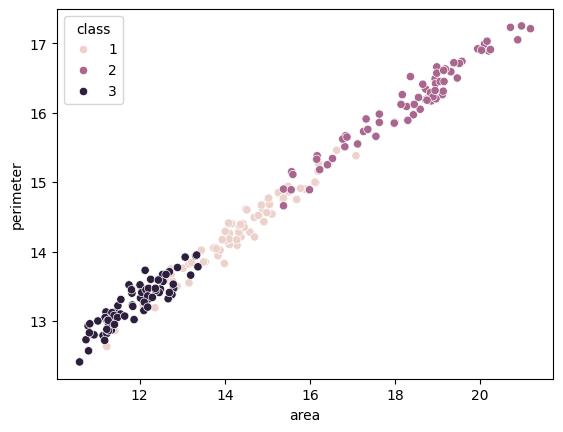

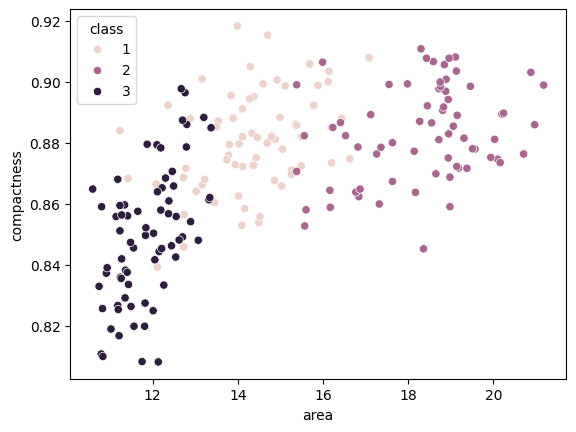

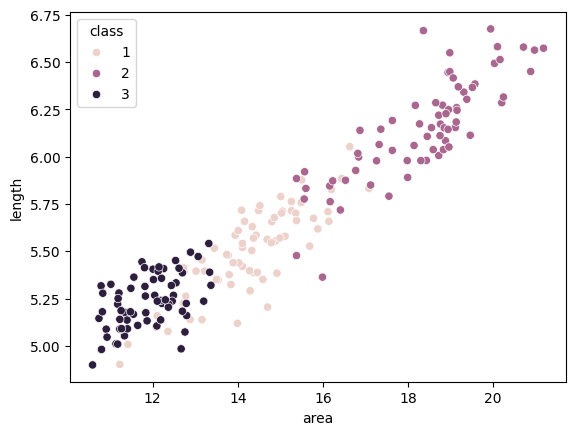

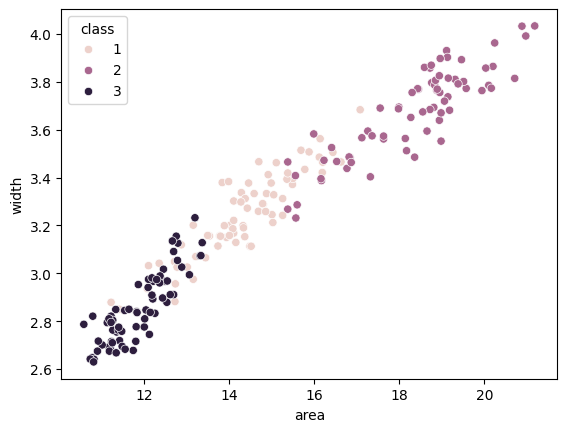

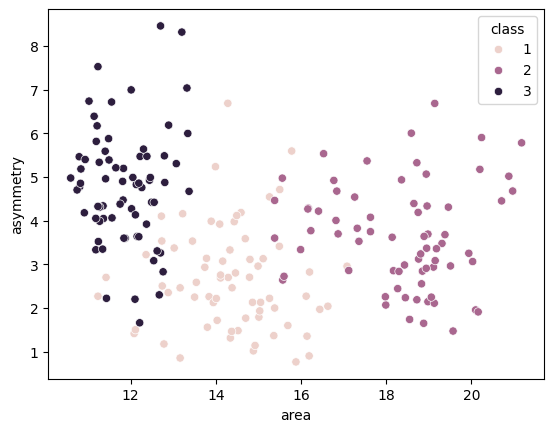

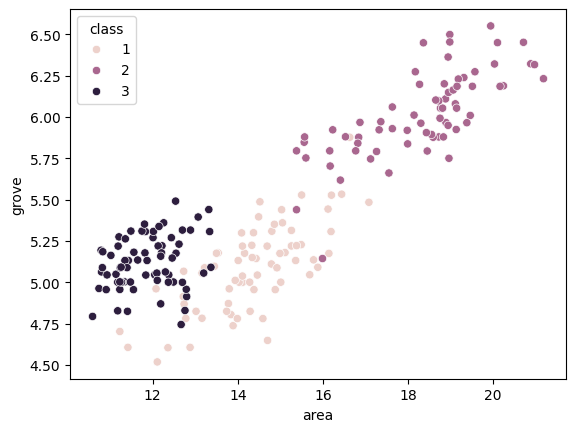

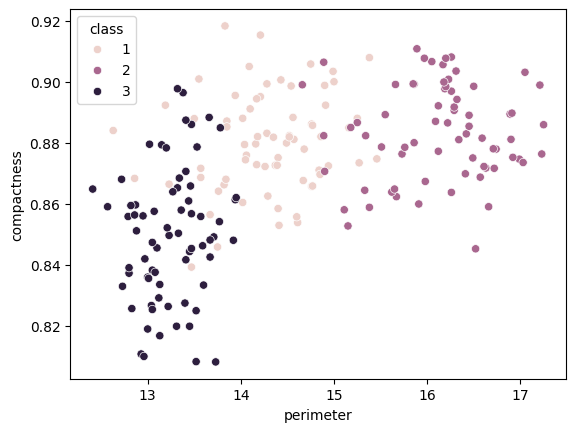

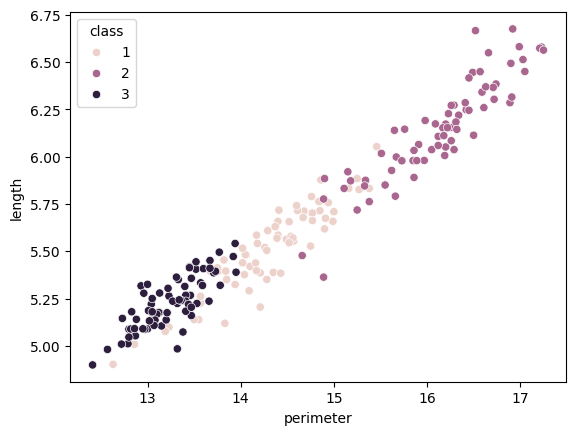

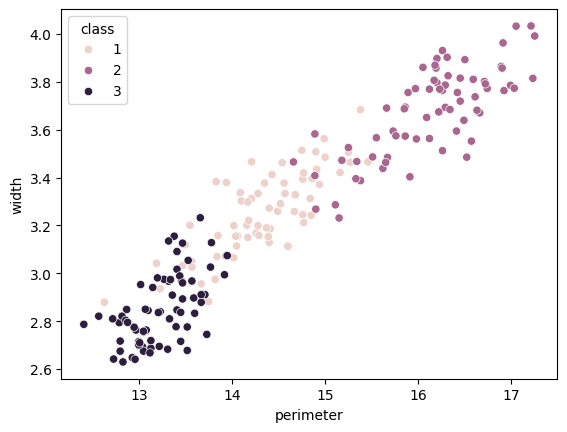

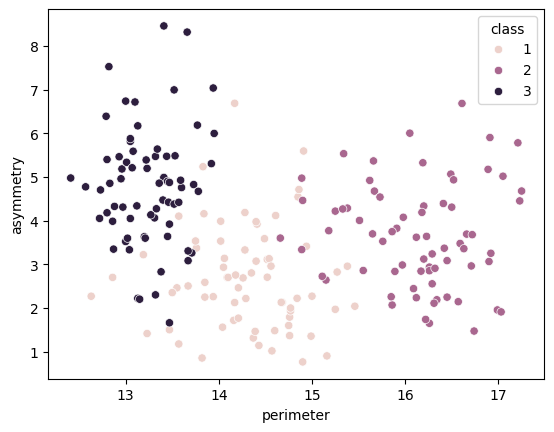

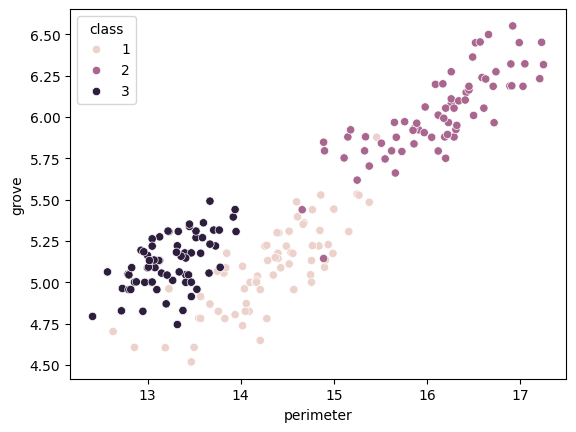

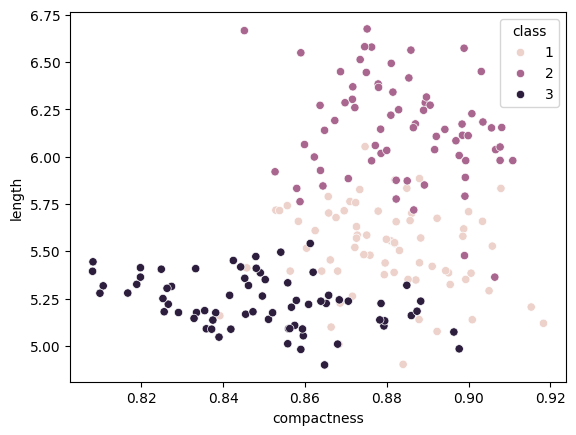

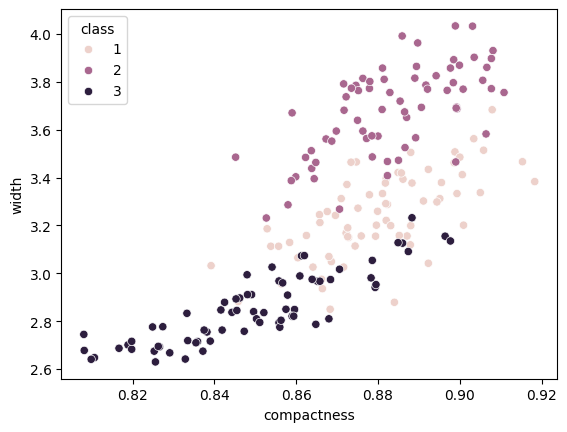

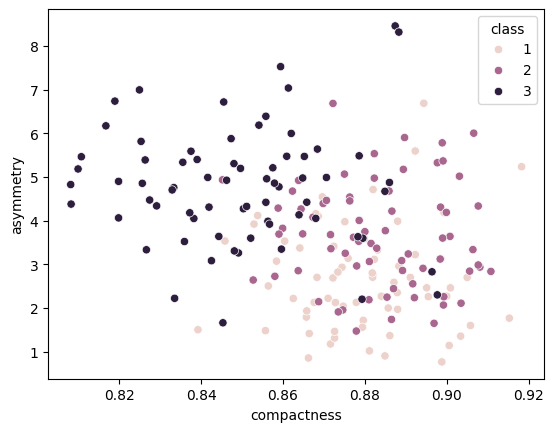

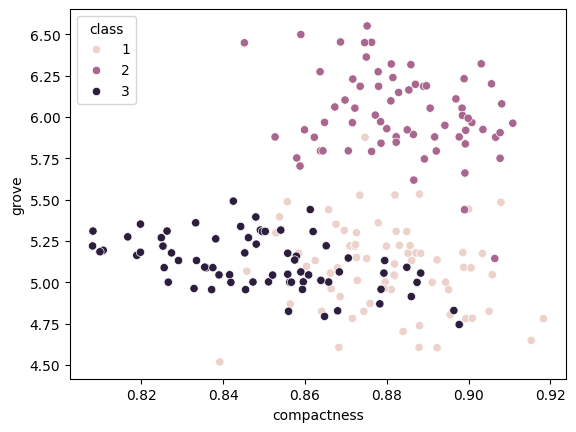

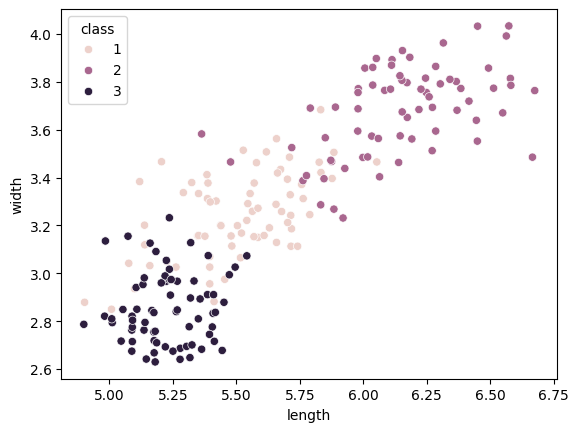

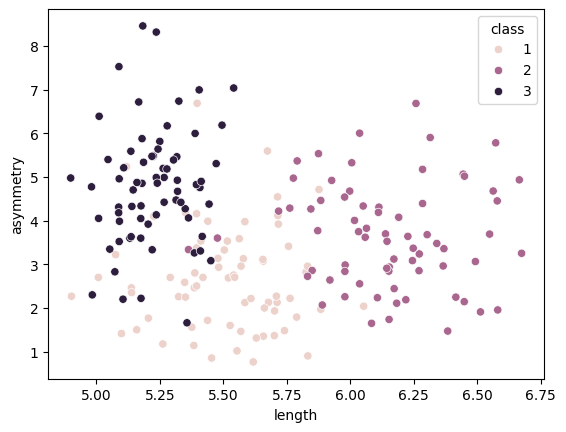

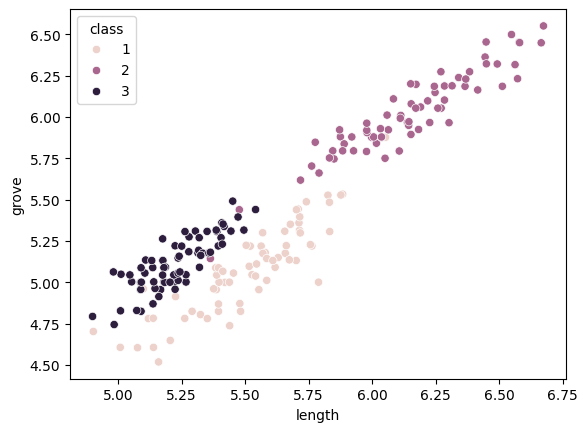

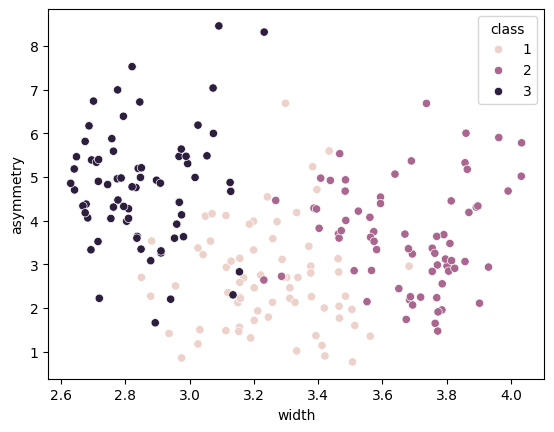

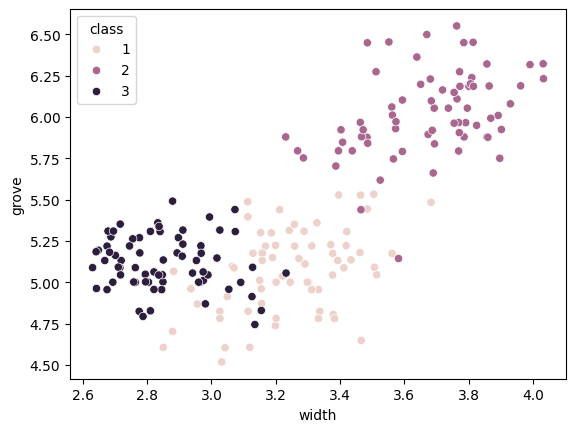

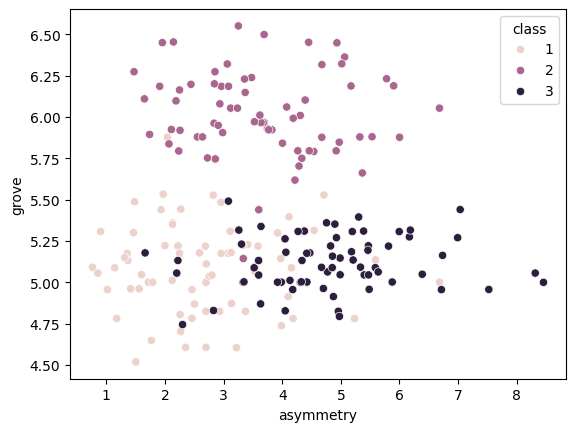

In [4]:
for i in range(len(cols)-1):
  for j in range(i+1, len(cols)-1):
    x_label = cols[i]
    y_label = cols[j]
    sb.scatterplot(x = x_label, y = y_label, data=df, hue = 'class')
    plt.show()

# Cluster

## 1D

In [5]:
x = 'compactness'
y = 'asymmetry'
X = df[[x, y]].values

here im making my own class from perimeter n asymmetry columns and then comparing it with original

In [6]:
Kmeans = KMeans(n_clusters = 3)
Kmeans.fit(X)

KMeans(n_clusters=3)

In [7]:
clusters = Kmeans.labels_

kmeans.labels_ returns an array of integers representing the cluster assignment for each sample in your dataset.


In [8]:
clusters

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 2, 2, 2, 1, 1, 1, 1, 0,
       2, 0, 1, 1, 0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0,
       2, 0, 2, 1, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0,
       0, 1, 2, 1, 0, 2, 0, 0, 0, 2, 0, 2], dtype=int32)

In [9]:
df['class'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [10]:
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns=[x, y, "class"])

X, clusters.reshape(-1, 1)  -->  X contains x,y and clusters class

In [11]:
cluster_df

,compactness,asymmetry,class
0,0.8710,2.221,1.0
1,0.8811,1.018,1.0
2,0.9050,2.699,1.0
3,0.8955,2.259,1.0
4,0.9034,1.355,1.0
...,...,...,...
205,0.8783,3.631,0.0
206,0.8511,4.325,0.0
207,0.8883,8.315,2.0
208,0.8521,3.598,0.0


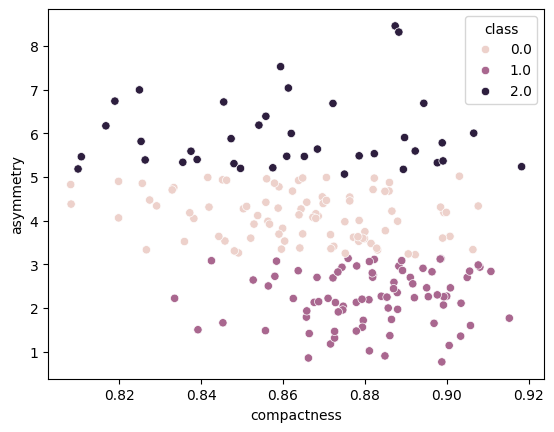

In [12]:
# k means for my cluster_df classes
sb.scatterplot(x=x, y=y, data=cluster_df, hue='class')
plt.show()

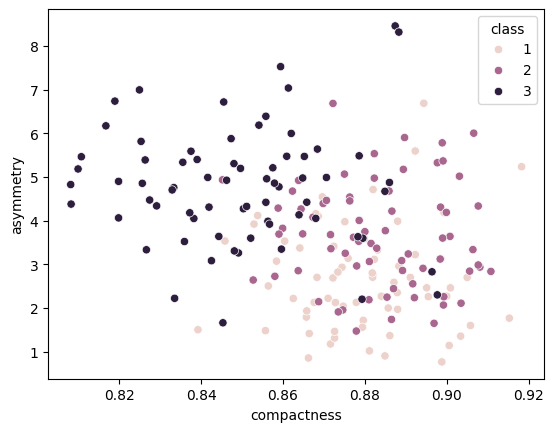

In [13]:
# k means for original classes
sb.scatterplot(x=x, y=y, data=df, hue='class')
plt.show()

## Higher Dimension

In [14]:
X = df[cols[:-1]].values

In [15]:
Kmeans = KMeans(n_clusters = 3)
Kmeans.fit(X)

KMeans(n_clusters=3)

In [16]:
clusters = Kmeans.labels_

In [17]:
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns=df.columns)

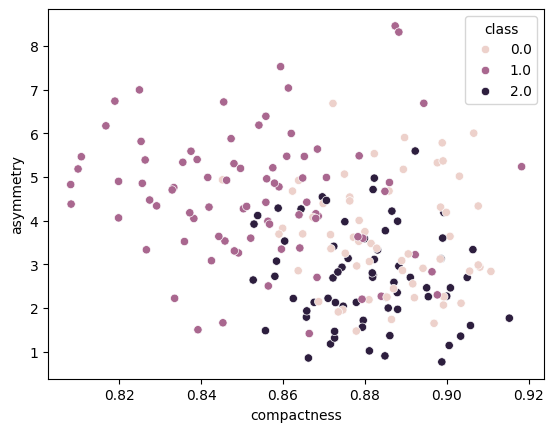

In [18]:
# k means for my cluster_df classes
sb.scatterplot(x=x, y=y, data=cluster_df, hue='class')
plt.show()

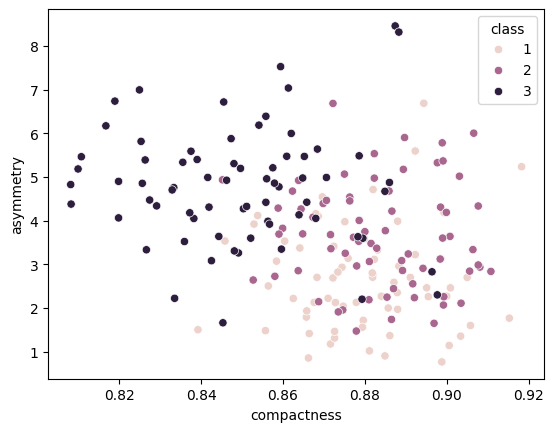

In [19]:
# k means for original classes
sb.scatterplot(x=x, y=y, data=df, hue='class')
plt.show()

# PCA

In [20]:
pca = PCA(n_components=2)
transformed_x = pca.fit_transform(X)

n_components=2  how many dimensions we want to reduce

In [21]:
X.shape

(210, 7)

In [23]:
transformed_x.shape

(210, 2)

In [24]:
transformed_x[:5]

array([[ 0.66344838, -1.41732098],
       [ 0.31566651, -2.68922915],
       [-0.6604993 , -1.13150635],
       [-1.0552759 , -1.62119002],
       [ 1.61999921, -2.18338442]])

each point is 2D having 2 points

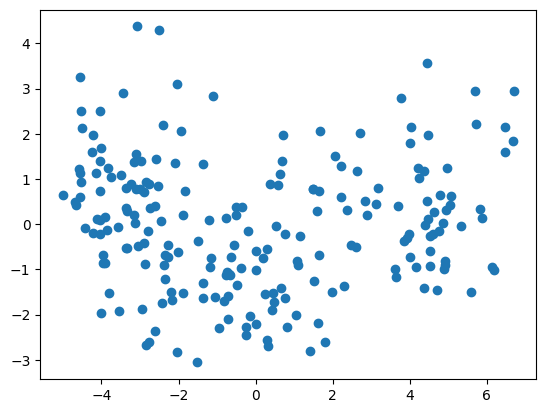

In [25]:
plt.scatter(transformed_x[:, 0], transformed_x[:, 1])
plt.show()

In [26]:
Kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x, Kmeans.labels_.reshape(-1, 1))), columns=['pca1','pca2','class'])

In [28]:
truth_pca_df = pd.DataFrame(np.hstack((transformed_x, df['class'].values.reshape(-1, 1))), columns=['pca1','pca2','class'])

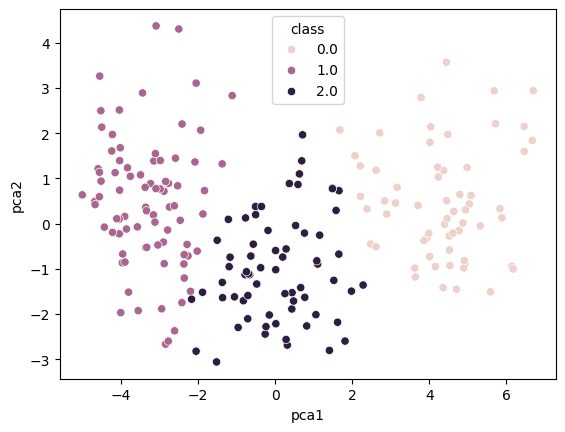

In [29]:
# k means for my Kmeans_pca_df
sb.scatterplot(x='pca1', y='pca2', data=Kmeans_pca_df, hue='class')
plt.show()

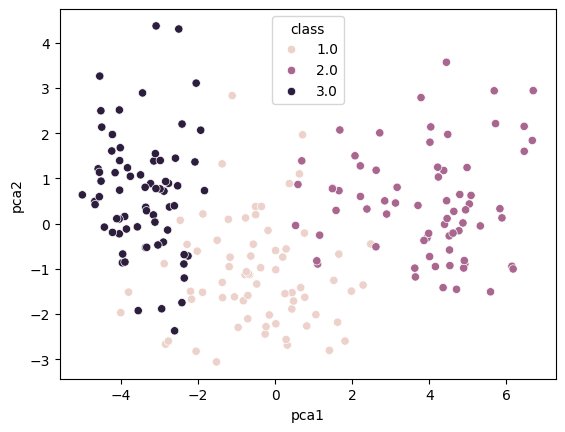

In [30]:
# k means for original truth_pca_df
sb.scatterplot(x='pca1', y='pca2', data=truth_pca_df, hue='class')
plt.show()